# OCR

In [ ]:
import pytesseract
import pandas as pd
from PIL import Image, ImageOps
from pathlib import Path
import glob
import os

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [2]:
input_dir = Path(r"C:\Users\Somebody\DS kursas\Projektas\Publikacijos\1931")

scaled_images = []

for img_path in input_dir.rglob("*.jpg"):
    img = Image.open(img_path)
    img_scaled = ImageOps.scale(img, 0.5)
    scaled_images.append((img_path.stem, img_scaled))


In [ ]:
for image_name, img_scaled in scaled_images:
    text = pytesseract.image_to_string(img_scaled, lang='lit')
    print(f"{image_name}:\n{text}\n")
    

image_1:
ši
Kriminalinės

Police

ijos Žinios

LEIDŽIA KRINIL kasis senos VALDYBA, KAUNAS, MIŠKŲ G-VIE 13. TEL. 521 IR 26-95

Uneti ||

s, 1031 m. sausio mėn. 15 d.

| 0).

I,

Ieškomi asmenys.

1. Buivickas Petras, Juozo s, žemdirbys,
lietuvis, R. katalikas, gim. 1907. V.'12. Alytaus
ap, Stakliškių v., Pakronų km.. | Paskutiniu
laiku gyveno Alytaus ap., Alonės v., Patoronių
k. Turi vid. pasą bl. nr. 3669608, eil. nr.
3508, duotą 1930 m. Stakliškių v. v.. 1930 m.
už vagystę, sėdėjo 1'* m. Alytaus arešto na-
muose. Žymės; vidut. ūgio, laibas, plaukai ju
ūsai juodi, forma anglų, "vad. „galiie“, veidas
pailgas, rauplėtas, burna maža, dantys visi, didel
tankūs, kalba greitai. Ieško Alytaus ap. poli
III nuov. v-kas r. 35583 nr. 1930.XII. 31. Kalti
neišėmęs savo laiku vid. paso. Reikalinga nuklausti
Suradus pranešti jam.

2. Dinsmonienė — Krasnickaitė Ona,
Kazio ir Onos d., gim. 1883.XII 7. Gulbinėnų
dv., Krinčino v., Biržų ap., lietuvė, R. katalikė.

vidut. ūgio, tvirto kūno sudėjimo, pilna

In [7]:
output_dir = Path(r"C:\Users\Somebody\DS kursas\Projektas\csv2")
output_dir.mkdir(exist_ok=True)

for idx, (stem, img_scaled) in enumerate(scaled_images, start=1):
    data = pytesseract.image_to_data(img_scaled, lang='lit', output_type=pytesseract.Output.DATAFRAME)

    filename = output_dir / f'data_image_{idx}.csv'

    if not filename.exists():
        data.to_csv(filename, index=False)
    else:
        print(f"Skipped {filename} (already exists)")
        

In [ ]:
output_dir = Path(r"C:\Users\Somebody\DS kursas\Projektas\csv2")

csv_files = glob.glob(os.path.join(output_dir, '*.csv'))

data_frames = list()

for file in csv_files:
    data_frame = pd.read_csv(file)
    data_frames.append(data_frame)

data = pd.concat(data_frames, ignore_index=True)
cleaned_data = data[data["text"].notna()] #notna įskaito tarpus


In [4]:
cleaned_data.head(20)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,385,4,17,25,42.074848,ši
6,5,1,1,1,2,1,136,35,501,59,96.286667,Kriminalinės
10,5,1,2,1,1,1,69,111,201,71,8.418922,Police
14,5,1,3,1,1,1,284,115,138,69,89.367134,ijos
15,5,1,3,1,1,2,443,104,252,65,95.386108,Žinios
19,5,1,4,1,1,1,632,202,7,8,95.000000,
23,5,1,5,1,1,1,53,191,58,15,92.446480,LEIDŽIA
24,5,1,5,1,1,2,120,187,43,27,26.526901,KRINIL
25,5,1,5,1,1,3,171,168,56,55,38.269569,kasis
26,5,1,5,1,1,4,235,172,78,47,7.750099,senos


# Clustering

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
df = cleaned_data

features = df[['left', 'top', 'width', 'height', 'conf']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

print(df)


        level  page_num  block_num  par_num  line_num  word_num  left   top  \
4           5         1          1        1         1         1   385     4   
6           5         1          1        1         2         1   136    35   
10          5         1          2        1         1         1    69   111   
14          5         1          3        1         1         1   284   115   
15          5         1          3        1         1         2   443   104   
...       ...       ...        ...      ...       ...       ...   ...   ...   
140819      5         1         41        1         1         1   562   990   
140823      5         1         42        1         1         1   765  1006   
140827      5         1         43        1         1         1   497  1019   
140831      5         1         44        1         1         1   588  1063   
140835      5         1         45        1         1         1   781   763   

        width  height       conf          text  clu

C:\Users\Somebody\AppData\Local\Temp\ipykernel_9060\4236424908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(features_scaled)


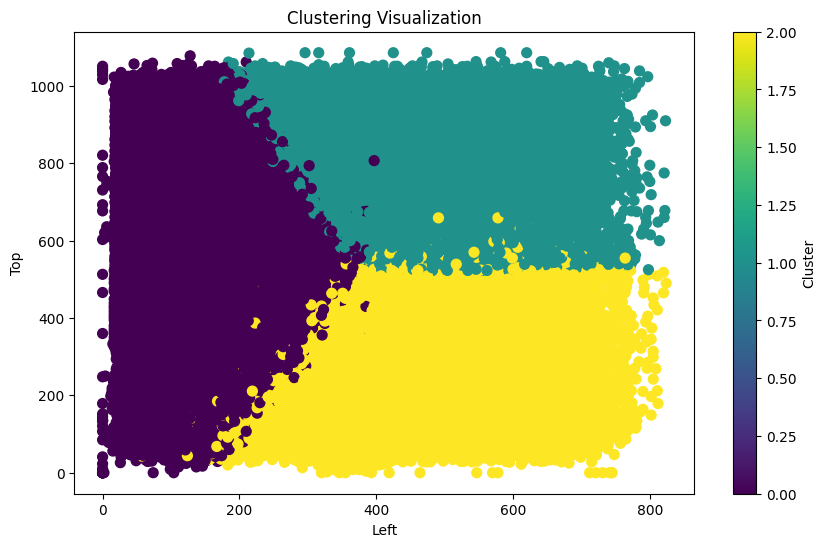

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['left'], df['top'], c=df['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Left')
plt.ylabel('Top')
plt.title('Clustering Visualization')
plt.show()


In [ ]:
cluster_groups = df.groupby('cluster')
for cluster_id, group in cluster_groups:
    print(f"Cluster {cluster_id}:")
    print(group)


Cluster 0:
        level  page_num  block_num  par_num  line_num  word_num  left   top  \
6           5         1          1        1         2         1   136    35   
10          5         1          2        1         1         1    69   111   
14          5         1          3        1         1         1   284   115   
23          5         1          5        1         1         1    53   191   
24          5         1          5        1         1         2   120   187   
...       ...       ...        ...      ...       ...       ...   ...   ...   
140163      5         1         14        2        10         2   155   992   
140172      5         1         14        2        11         1   122  1009   
140173      5         1         14        2        11         2   145  1007   
140174      5         1         14        2        11         3   203  1007   
140182      5         1         14        2        12         1   122  1022   

        width  height       conf        

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(df['text'].fillna(''))

from scipy.sparse import hstack
features_combined = hstack([features_scaled, text_features])


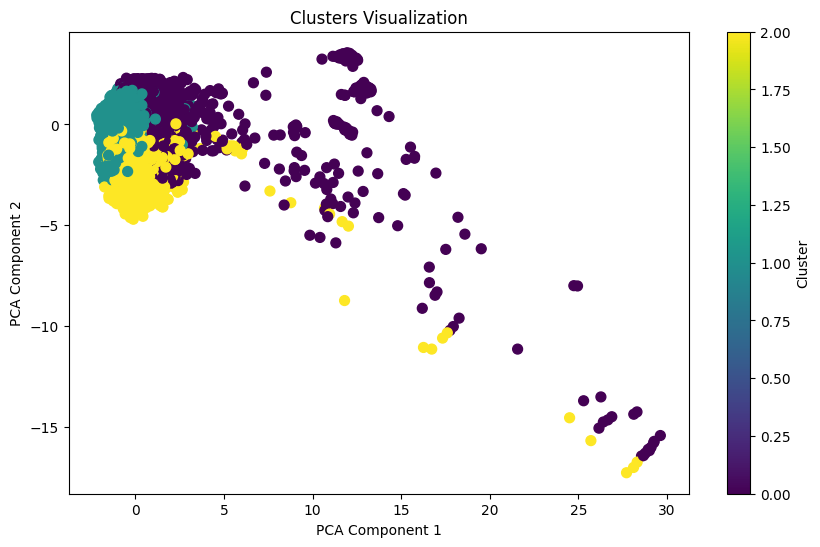

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_combined.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
reduced_features_tsne = tsne.fit_transform(features_combined.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features_tsne[:, 0], reduced_features_tsne[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('t-SNE Clusters Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#laggino ir crash

# Pavyzdys kaip veikia iliustracijos skaldymas teksto blokais

In [ ]:
image = Image.open(r"C:\Users\Somebody\DS kursas\Projektas\Publikacijos\1931\Nr.1\image_4.jpg")
data = pytesseract.image_to_data(image, lang='lit', output_type=pytesseract.Output.DATAFRAME)


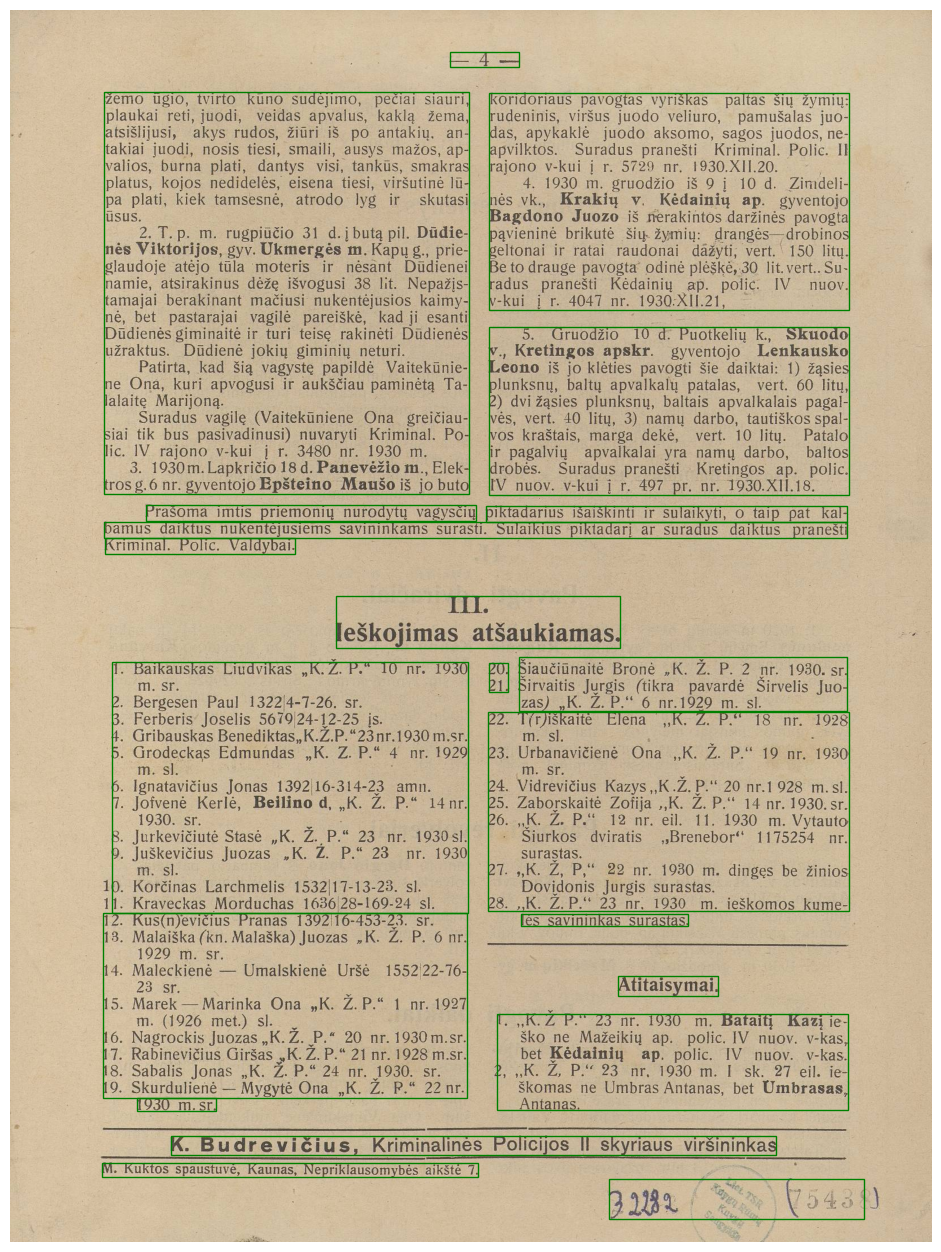

In [42]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 16))

for idx, row in data[::-1].iterrows():
    level_colors = {
        1: 'blue',    # Page
        2: 'green',   # Block
        3: 'yellow',  # Paragraph
        4: 'orange',  # Line
        5: 'red'      # Word
    }

    if row["level"] not in [2]:
        continue

    x, y = row['left'], row['top']
    w, h = row['width'], row['height']
    
    color = level_colors[row['level']]
    rect = Rectangle((x, y), w, h, fill=False, edgecolor=color, linewidth=1)
    ax.add_patch(rect)

plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()
